In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Main purpose of this study : 

**Can you predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?**

### Part - 1 : First contact with the dataset

In [2]:
# Loading the dataset : 
df = pd.read_csv('data/survey.csv')

**Observing the dataset :**

In [3]:
# Observing the first few rows : 
df.head(5) # first five rows 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Observing the last few rows : 
df.tail(5)  # last five rows

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Observing a random samples from the dataset : 
df.sample(5) # five random samples

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
69,2014-08-27 11:52:44,34,Male,United States,NY,Yes,No,No,Rarely,1-5,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
414,2014-08-27 15:31:10,26,F,United States,OK,No,No,Yes,Sometimes,100-500,...,Somewhat difficult,No,No,Some of them,Some of them,No,No,Yes,No,NaN
370,2014-08-27 15:15:42,22,F,United States,WA,No,No,No,NaN,More than 1000,...,Somewhat easy,No,No,No,Some of them,No,No,Yes,No,NaN
107,2014-08-27 12:25:09,28,Male,Brazil,NaN,No,Yes,Yes,Rarely,6-25,...,Don't know,Maybe,No,Yes,Yes,No,No,Don't know,Yes,NaN
42,2014-08-27 11:43:07,27,Male,Canada,NaN,No,Yes,Yes,Sometimes,1-5,...,Very difficult,Maybe,No,Some of them,No,No,No,Yes,No,NaN


**General information about the dataset :**

In [6]:
# dimension of the dataset : 
print(f'number of features : {df.shape[1]}')
print(f'number of rows : {df.shape[0]}')

number of features : 27
number of rows : 1259


In [7]:
# Extensive info about the dataset : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
# Summary statistics of numerical features ; 
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Part - 2 : Data cleaning

**Inspecting missing data :**

In [9]:
# Total number of missing data for each feature : 
total = df.isnull().sum().sort_values(ascending=False)

# Total number of missing data for each feature as a percentage :
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

# Combining the two Series into one dataframe : 
missing_data = pd.concat([total, round(percent , 2)], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)


,Total,Percent
comments,1095,0.87
state,515,0.41
work_interfere,264,0.21
self_employed,18,0.01
seek_help,0,0.00


**Dropping unnecessary features :**

In [10]:
# Dropping the columns which appear to have a weak relationship with the target : 
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Filling missing values with standard values :**

In [11]:
# Assigning default values for each data-type
default_values = {
    'int': 0,
    'string': 'NaN',
    'float': 0.0
}

# Split features by data-type
features_by_type = {
    'int': ['Age'],
    'string': ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
               'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
               'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
               'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program', 'seek_help'],
    'float': []
}

# Filling missing values using the two dictionaries
# Iterating over all the features of the dataframe
for feature in df:
    # Initialize a flag to check if feature is recognized
    recognized = False
    
    # Iterating over datatypes and their corresponding features
    for dtype, features in features_by_type.items():
        # Checking if the selected feature falls in a data-type category
        if feature in features:
            # Filling any missing values with the default value and reassigning it to the DataFrame
            df[feature] = df[feature].fillna(default_values[dtype])
            recognized = True
            break

    if not recognized:
        print(f'Feature: {feature} is not recognized.')

df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Handling the gender feature :**

The gender is full of inconsistencies and many unnecessary values.

Text(0, 0.5, 'frequency')

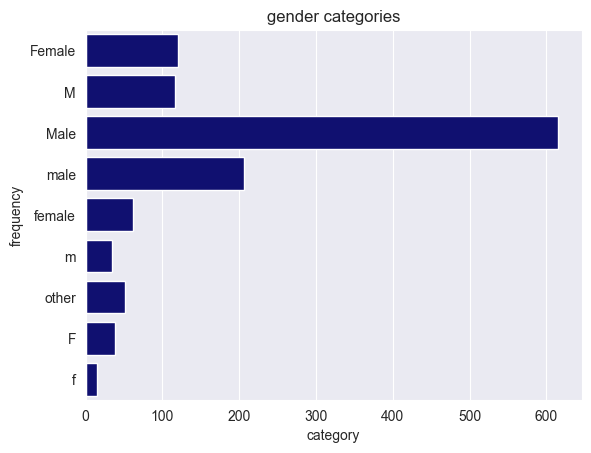

In [12]:
# Setting a trehsold frequency : 
tresh = 10 
# Retreiving the frequency of each value present in Gender :
gender_counts = df['Gender'].value_counts() 
# Filtering rare categories : 
rare_categories = gender_counts[gender_counts < tresh].index 
# Extracting a series to visualize it : 
gender_series = df['Gender'].replace(rare_categories , "other")

sns.set_style('darkgrid')
sns.countplot(data= gender_series , color= 'navy')
plt.title('gender categories')
plt.xlabel('category')
plt.ylabel('frequency')


In [13]:
# Define the mapping of values to standardized gender categories
gender_mapping = {
    'male': ['male', 'm', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man', 'Cis Male', 'cis male'],
    'female': ['cis female', 'f', 'female', 'woman', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail']
}

# Create a reverse mapping for quick look-up
reverse_mapping = {v : k for k, values in gender_mapping.items() for v in values}

# Lowercase all entries in the Gender column
df['Gender'] = df['Gender'].str.lower()

# Print original unique values
print("Original unique Gender values:", df['Gender'].unique())

# Replace values based on the mapping
df['Gender'] = df['Gender'].replace(reverse_mapping)

# Print unique values after mapping
print("After mapping:", df['Gender'].unique())

# Unify all non-male/female entries into "unknown"
df['Gender'] = df['Gender'].where(df['Gender'].isin(['male', 'female']), other='unknown')

# Remove unwanted entries (if you want to drop them instead of labeling as 'unknown')
stk_list = ['a little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

# Display unique values in the cleaned Gender column
print("Final unique Gender values:", df['Gender'].unique())

Original unique Gender values: ['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']
After mapping: ['female' 'male' 'trans-female' 'something kinda male?' 'queer/she/they'
 'non-binary' 'nah' 'all' 'enby' 'fluid' 'genderqueer' 'androgyne'
 'agender' 'guy (-ish) ^_^' 'male leaning androgynous' 'trans woman'
 'neuter' 'female (trans)' 'queer' 'a little about you' 'p'
 'ostensibly male, unsure what that really means']
Final unique Gender values: ['female' 'male' 'unknown']


**Handling the age:**

The age contains outliers, which can cause problems during the training processes.

In [14]:
# the median of the age sequence : 
median_age = df['Age'].median() 
#  filling outlier values with the median age : 
df['Age'] = df['Age'].apply(lambda x : median_age if (x < 18 or x > 70) else x )
# Adding an age range feature : 
df['Age_range'] = pd.cut(df['Age'], [0, 20, 30, 55 , 70 ], labels=["18-20", "20-30", "30-55", "55-70"], include_lowest=True)

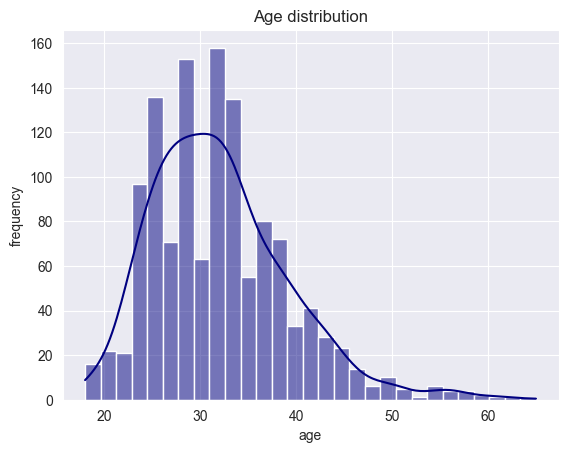

In [15]:
# Let's visualize the age distribution :
sns.set_style('darkgrid') 
sns.histplot( x =  'Age' , data = df , kde = True , fill = True , color = 'navy')
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

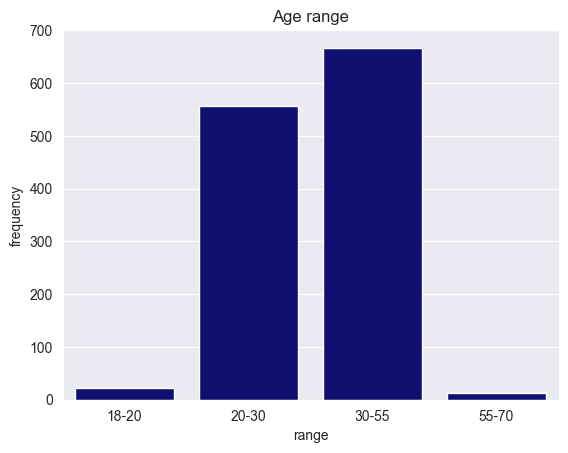

In [16]:
# Let's visualize the age distribution :
sns.set_style('darkgrid') 
sns.countplot( x =  'Age_range' , data = df , color = 'navy' )
plt.title('Age range')
plt.xlabel('range')
plt.ylabel('frequency')
plt.show()

**Handling self employement feature :**

In [ ]:
# Let's first inspect the distribution of the feature : 
sns.set_style('darkgrid') 
sns.countplot( x =  'self_employed' , data = df , color = 'navy' )
plt.title('Self employment distribution')
plt.xlabel('range')
plt.ylabel('frequency')
plt.show()

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64